In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from scipy.stats import sem
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.metrics import classification_report, matthews_corrcoef
warnings.filterwarnings('ignore')

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
  # importing data

df = pd.read_csv('/content/drive/MyDrive/DataScience Project/csgo_round_snapshots.csv')
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0,0,0,0,0,0,0,0,0,CT
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,0,0,0,0,0,0,0,CT
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,0,0,0,0,0,0,0,CT
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0,0,0,0,0,0,0,0,0,CT


In [22]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_grenade_molotovgrenade', 't_grenade_molotovgrenade',
       'ct_grenade_decoygrenade', 't_grenade_decoygrenade', 'round_winner'],
      dtype='object')

In [23]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0,0,0,0,0,0,0,0,0,CT
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,0,0,0,0,0,0,0,CT
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,0,0,0,0,0,0,0,CT
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0,0,0,0,0,0,0,0,0,CT


Box plots for data

creating box plots for values

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b87f6e680>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b87f6ebc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b87f6e3e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b87ef9030>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b87f6ed40>],
 'means': []}

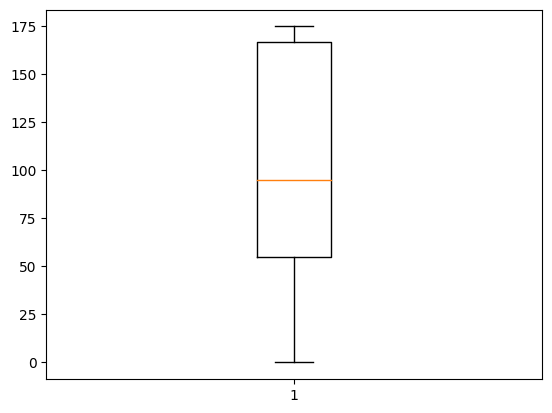

In [24]:
plt.boxplot(df.time_left)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b87de0eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b87de13f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b87de0c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b87de1930>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b87de1bd0>],
 'means': []}

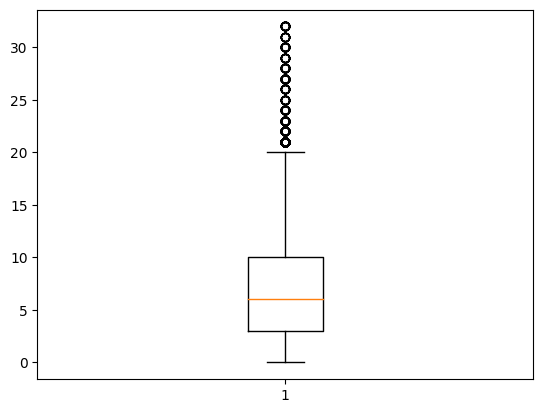

In [25]:
plt.boxplot(df.ct_score)



{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b87e375e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b87e37b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b87e37340>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b87e6c0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b87e6c340>],
 'means': []}

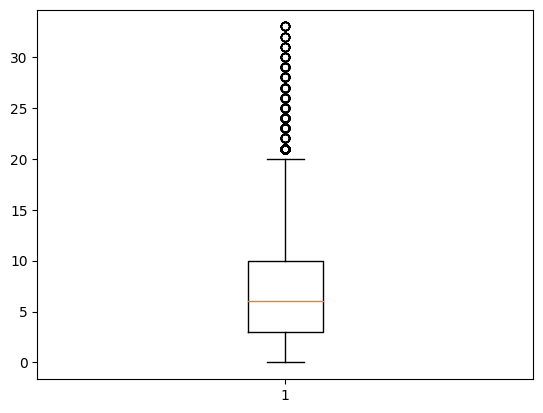

In [26]:
plt.boxplot(df.t_score)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b87cbd8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b87cbde10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b87cbd630>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b87cbe350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b87cbe5f0>],
 'means': []}

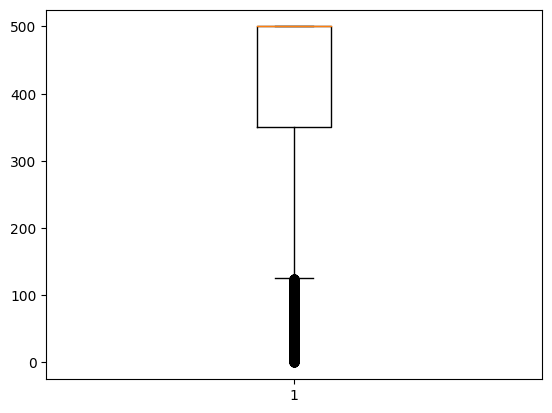

In [27]:
plt.boxplot(df.ct_health)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b87d1b160>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b87d1b6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b87d1aec0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b87d1bbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b87d1be80>],
 'means': []}

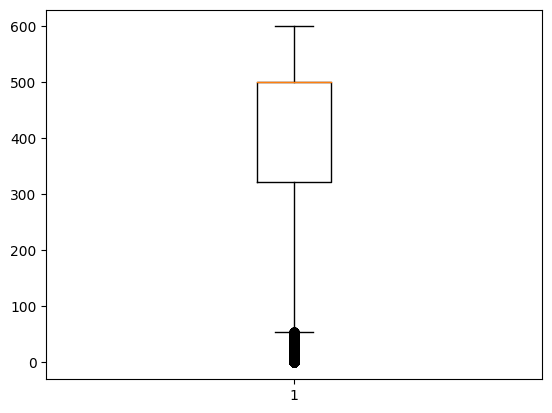

In [28]:
plt.boxplot(df.t_health)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b88131030>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b88133580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b880fa7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b88133f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b88132230>],
 'means': []}

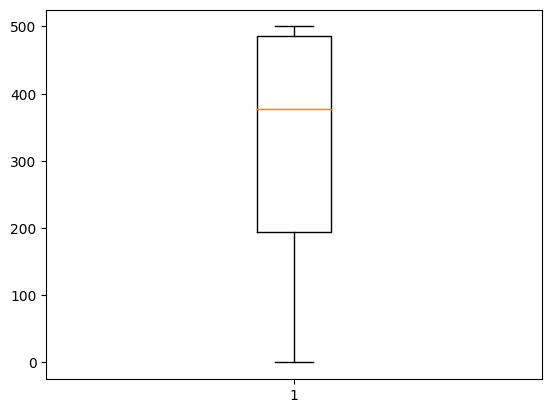

In [29]:
plt.boxplot(df.ct_armor)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b87ebac20>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b880444c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b87ebaf80>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b88046e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b88045840>],
 'means': []}

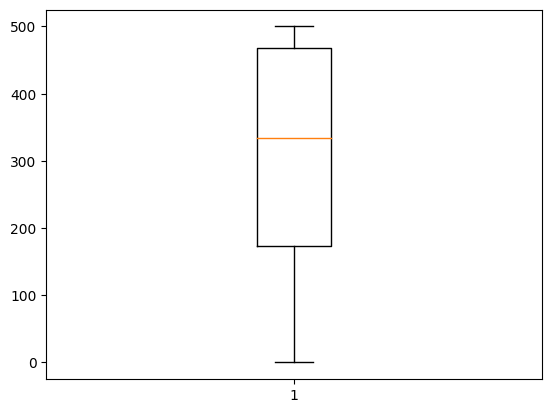

In [30]:
plt.boxplot(df.t_armor)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b88f2c370>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b88f2dcf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b88f2e8c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b88f2d690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b88f2d9f0>],
 'means': []}

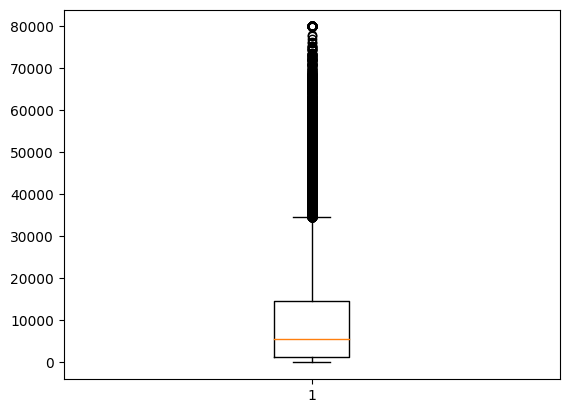

In [31]:
plt.boxplot(df.ct_money)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b892033d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b89201480>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b89201030>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b89201870>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b89203d00>],
 'means': []}

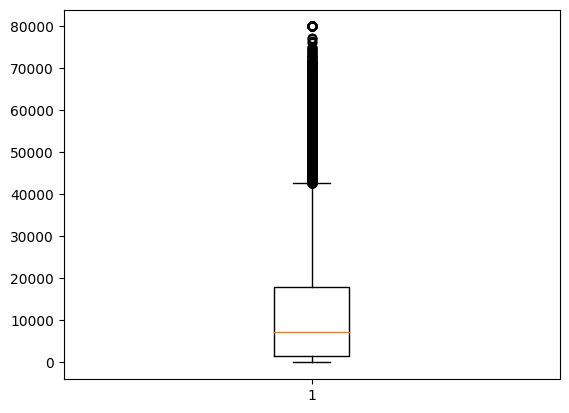

In [32]:
plt.boxplot(df.t_money)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b88af9660>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b88afac50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b88af9930>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b88af82b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b88a551e0>],
 'means': []}

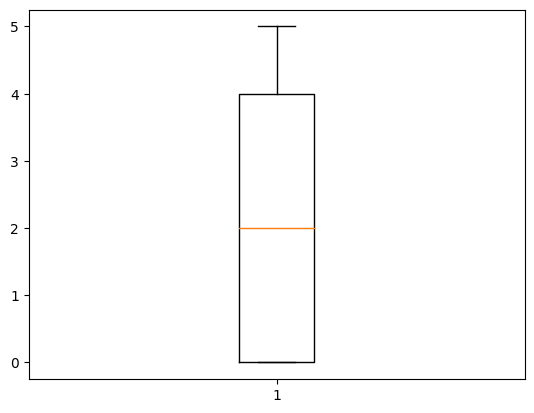

In [33]:
plt.boxplot(df.ct_helmets)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b88ac3f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b88ac35e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b88ac07f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b88ac2ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b88ac2e90>],
 'means': []}

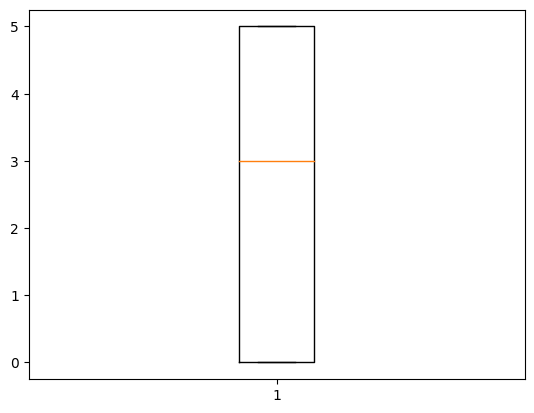

In [34]:
plt.boxplot(df.t_helmets)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b88c762c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b88c76b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b88c75c60>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b88c74970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b88c74040>],
 'means': []}

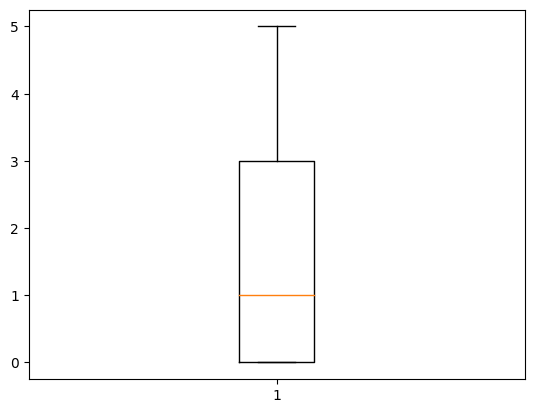

In [35]:
plt.boxplot(df.ct_defuse_kits)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b88ba87c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b88c5bc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b88ba8310>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b88c5bd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b88c5bac0>],
 'means': []}

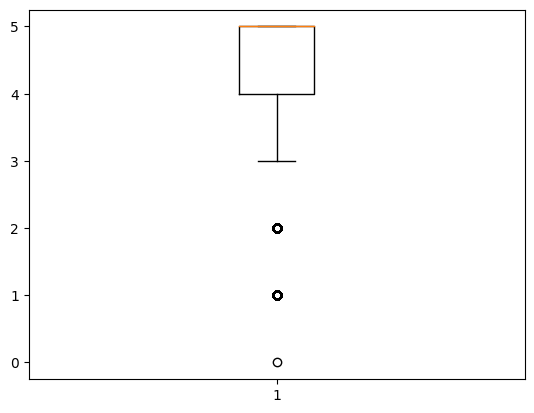

In [36]:
plt.boxplot(df.ct_players_alive)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b88c003d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b88c02b60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b88c02da0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b88c021a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b88c00670>],
 'means': []}

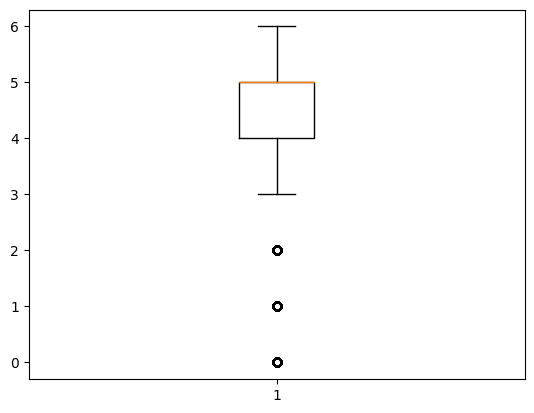

In [37]:
plt.boxplot(df.t_players_alive)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b895799c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b8957a020>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b8957b0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b89579fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b89579ae0>],
 'means': []}

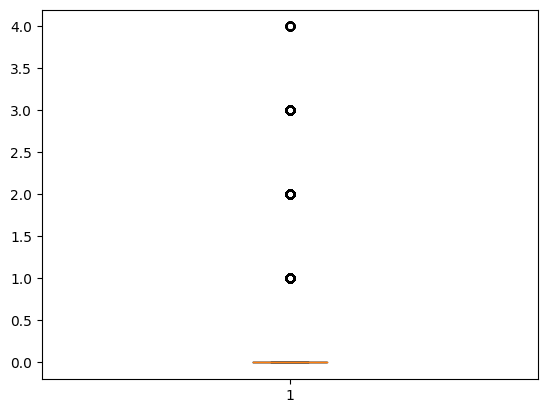

In [38]:
plt.boxplot(df.ct_weapon_ak47)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b89cad3c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b89cad960>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b89caf430>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b89cae860>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b89cae9e0>],
 'means': []}

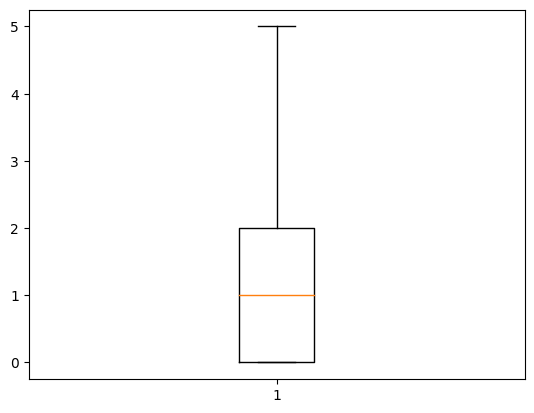

In [39]:
plt.boxplot(df.t_weapon_ak47)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b88d94220>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b88d945e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b8ab74ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b88d95b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b88d958a0>],
 'means': []}

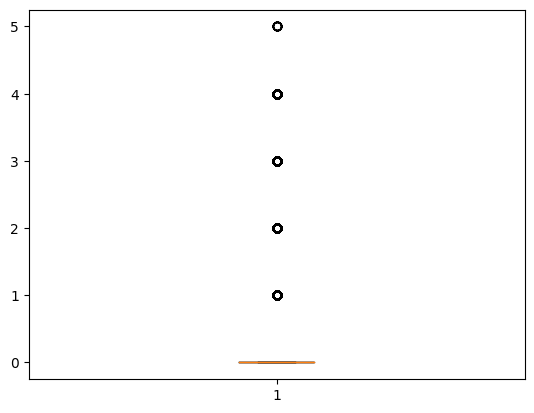

In [40]:
plt.boxplot(df.ct_weapon_aug)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b8aa4e920>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b899788e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b8aa4c490>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b89978fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b8997a680>],
 'means': []}

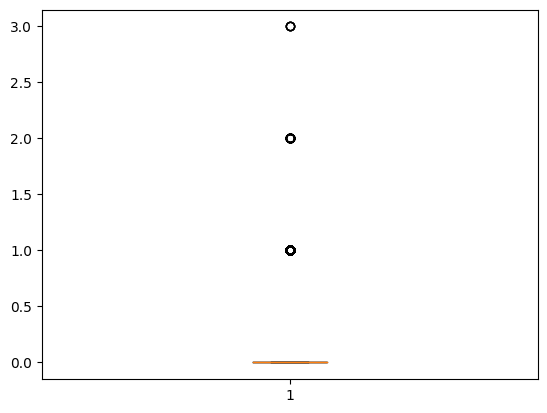

In [41]:
plt.boxplot(df.t_weapon_aug)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b88dffbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b88d61210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b88dff880>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b88d61b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b88d62410>],
 'means': []}

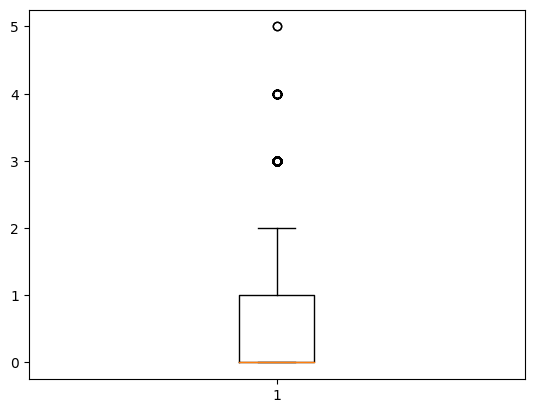

In [42]:
plt.boxplot(df.ct_weapon_awp)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b88a09bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b88a08970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b88a080a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b88a09de0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b88a08a90>],
 'means': []}

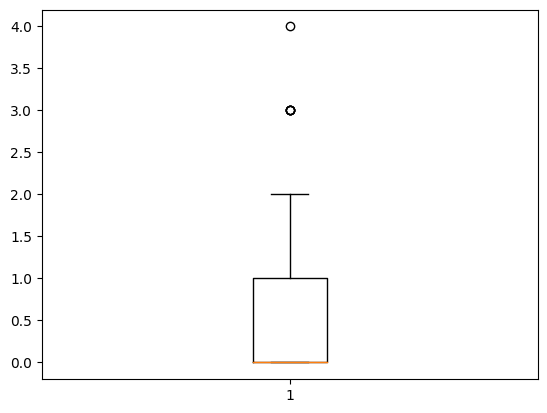

In [43]:
plt.boxplot(df.t_weapon_awp)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b8a8a1060>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b87d79390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b87d78cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b87d798d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b87d79b70>],
 'means': []}

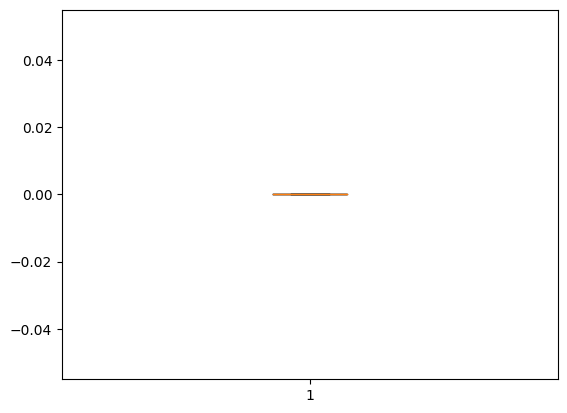

In [44]:
plt.boxplot(df.ct_weapon_bizon)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b89356800>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b89354940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b893544c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b89356fb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b893559c0>],
 'means': []}

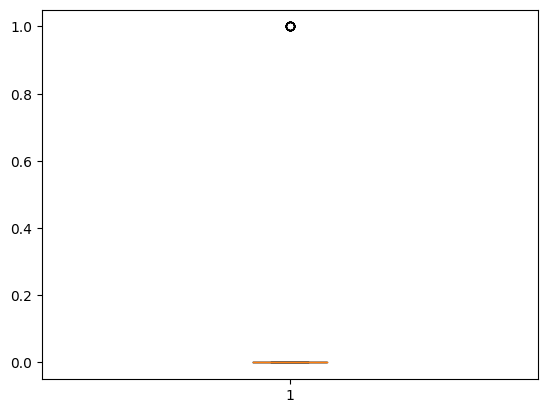

In [45]:
plt.boxplot(df.t_weapon_bizon)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b89288a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b89288f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b892888b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b892894b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b89289750>],
 'means': []}

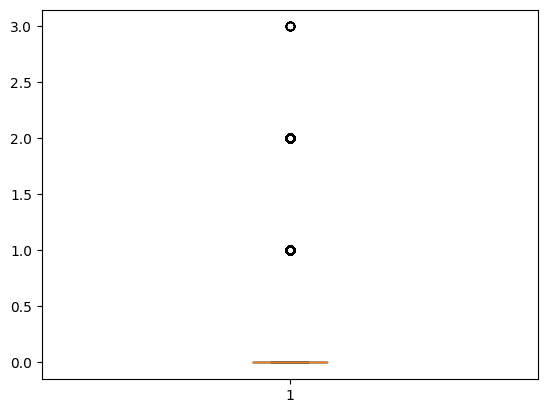

In [46]:
plt.boxplot(df.ct_grenade_molotovgrenade)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b89213b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b891e40d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b892138b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b891e4610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b891e48b0>],
 'means': []}

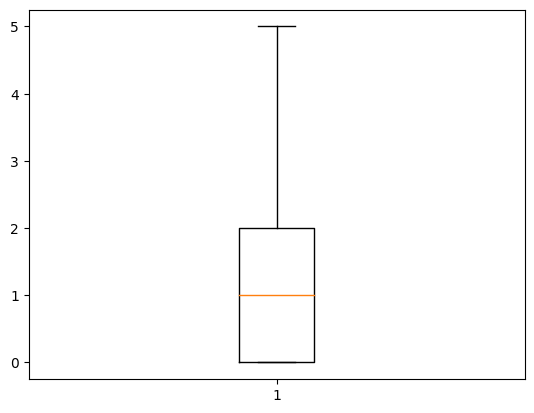

In [47]:
plt.boxplot(df.t_grenade_molotovgrenade)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b89832aa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b89832fe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b89832800>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b89833520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b898337c0>],
 'means': []}

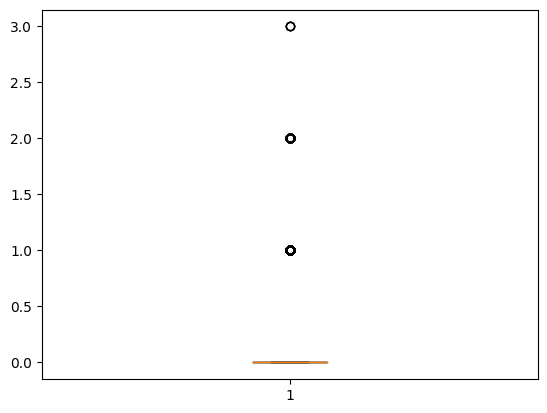

In [48]:
plt.boxplot(df.ct_grenade_decoygrenade)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c8b89885ff0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c8b89886530>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c8b89885d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7c8b89886a70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8b89886d10>],
 'means': []}

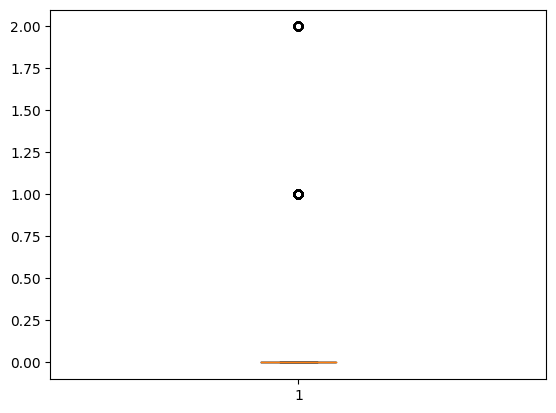

In [49]:
plt.boxplot(df.t_grenade_decoygrenade)

In [ ]:
!pip install sweetviz
import sweetviz as ss
report = ss.analyze(df)
report.show_html()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 65.4 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Histogram For Data

In [ ]:
sns.displot(df, bins=35)

Scatter plot for winners

In [ ]:
count_ter = sns.scatterplot(x="time_left", y="ct_health", data=df)
count_ter.set_title("Winner Scatter Plot for Counter terrorist")
count_ter.set_xlabel("Time Left");
count_ter.set_ylabel("Health");

In [ ]:
ter = sns.scatterplot(x="time_left", y="t_health", data=df)
ter.set_title("Winner Scatter Plot for terrorist")
ter.set_xlabel("Time Left");
ter.set_ylabel("Health");

Performing Preprocessing

In [ ]:
df.shape

ccategorical to numeric

In [ ]:
le = LabelEncoder()
df['map'] = le.fit_transform(df['map'])
df['bomb_planted'] = le.fit_transform(df['bomb_planted'])
df['round_winner'] = le.fit_transform(df['round_winner'])

KNN MODEL ACCURACY CHECK BEFORE PREPROCESSING

In [ ]:
X=df.drop(["round_winner"],axis=1)
Y=df['round_winner']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('accuracy score is: '+str(accuracy_score(y_test, y_pred)))

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()


In [ ]:
df.shape #(122410, 35)

In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace=True) #(117001, 35)

df.shape

In [ ]:
plt.figure (figsize= (16,10))
sns.heatmap(df.corr(),linewidths=.5,annot=True)
plt.show()


In [ ]:
df.drop(columns=['ct_weapon_bizon'], inplace = True)

In [ ]:
plt.figure (figsize= (16,10))
sns.heatmap(df.corr(),linewidths=.5,annot=True)
plt.show()


In [ ]:
df.info()
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
df = df.drop(to_drop, axis=1)
df.info()
#%%

In [ ]:
plt.figure (figsize= (16,10))
sns.heatmap(df.corr(),linewidths=.5,annot=True)
plt.show()

Normalization

```
# This is formatted as code
```



In [ ]:
df.info()

In [ ]:
df[df.columns[0]] = df[df.columns[0]] / df[df.columns[0]].max()
df[df.columns[1]] = df[df.columns[1]] / df[df.columns[1]].max()
df[df.columns[2]] = df[df.columns[2]] / df[df.columns[2]].max()
df[df.columns[5]] = df[df.columns[5]] / df[df.columns[5]].max()
df[df.columns[6]] = df[df.columns[6]] / df[df.columns[6]].max()
df[df.columns[7]] = df[df.columns[7]] / df[df.columns[7]].max()
df[df.columns[8]] = df[df.columns[8]] / df[df.columns[8]].max()
df[df.columns[9]] = df[df.columns[9]] / df[df.columns[8]].max()
df[df.columns[10]] = df[df.columns[10]] / df[df.columns[10]].max()
df.head()

Otliers Treatment

In [ ]:
cols = df.select_dtypes(['int64','float64']).columns
for column in cols:
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    ll= q1 - 1.5*IQR                       # Lower Limit
    ul = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < ll) | (df[column] > ul)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))

In [ ]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.95))
    x=x.clip(lower=x.quantile(0.05))
    return x
df=df.apply(outlier_capping)

In [ ]:
cols = df.select_dtypes(['int64','float64']).columns
for column in cols:
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    ll= q1 - 1.5*IQR                       # Lower Limit
    ul = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < ll) | (df[column] > ul)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))

In [ ]:
X=df.drop(["round_winner"],axis=1)
Y=df['round_winner']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('accuracy score is: '+str(accuracy_score(y_test, y_pred)))

IMBALCNCE DATA RESOLUTION

In [ ]:
sns.countplot(Y,label='round_winner')

In [ ]:

oversample = SMOTE()
x, y = oversample.fit_resample(X,Y)


In [ ]:
sns.countplot(y,label='round_winner')

In [ ]:
X=df.drop(["round_winner"],axis=1)
Y=df['round_winner']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('accuracy score is: '+str(accuracy_score(y_test, y_pred)))

LOSS GRAPH

In [ ]:
def evaluate_modelForPlot(X, y, repeats, k):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    model = KNeighborsClassifier(k)
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv, n_jobs=-1)
    return scores

def callModelForPlot(X, y):

    repeats = range(1,4)
    results = list()
    mean_res = list()
    k_vals = range(3,25, 2)
    for i in k_vals:

        for r in repeats:

            scores = evaluate_modelForPlot(X, y, r, i)
            results.append(np.mean(scores))
        mean_res.append(np.mean(results))
        results.clear()
    plt.plot(k_vals, mean_res, marker='o', mec='red')
    plt.xlabel('K Values')
    plt.ylabel('Accuracy')
    plt.show()
callModelForPlot(x,y)


Metrics
```
# This is formatted as code
```



In [ ]:

print(classification_report(y_test,y_pred))

In [ ]:
plt.boxplot(df.time_left)

In [ ]:
plt.boxplot(df.ct_score)



In [ ]:
plt.boxplot(df.t_score)

In [ ]:
plt.boxplot(df.ct_health)

In [ ]:
plt.boxplot(df.t_health)

In [ ]:
sns.displot(df, bins=35)

In [ ]:
matthews_corrcoef(y_test, y_pred)

0.4595912282295406